In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D
import os

from preprocessing import *

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

print(os.getcwd())

/Users/lijialin/Desktop/Research/proj-two-stage-task/Tree6


In [2]:
with open("data/Tree6_v3.json", "r") as f_real:
    real_data = [json.loads(line) for line in f_real]
for entry in real_data:
    entry["source"] = "Human"

# with open("data/rss/model1_RSS.json", "r") as f_sim:
#     model1_data = [json.loads(line) for line in f_sim]
# for entry in model1_data:
#     entry["source"] = "model1"

# with open("data/rss/model2_RSS.json", "r") as f_sim:
#     model2_data = [json.loads(line) for line in f_sim]
# for entry in model2_data:
#     entry["source"] = "model2"

# with open("data/rss/model3_RSS.json", "r") as f_sim:
#     model3_data = [json.loads(line) for line in f_sim]
# for entry in model3_data:
#     entry["source"] = "model3"

# with open("data/rss/model4_RSS.json", "r") as f_sim:
#     model4_data = [json.loads(line) for line in f_sim]
# for entry in model4_data:
#     entry["source"] = "model4"

# with open("data/rss/model5_RSS.json", "r") as f_sim:
#     model5_data = [json.loads(line) for line in f_sim]
# for entry in model5_data:
#     entry["source"] = "model5"

# with open("data/rss/model6_RSS.json", "r") as f_sim:
#     model6_data = [json.loads(line) for line in f_sim]
# for entry in model6_data:
#     entry["source"] = "model6"

df = real_data
df = pd.DataFrame(df)
df[['correct1', 'correct2', 'correct3', 'correct_all']] = df[['correct1', 'correct2', 'correct3', 'correct_all']].astype(bool)
df.head()

,wid,paths,path_rewards,visit_states,value1,value2,value3,choice1,choice2,choice3,...,diff1,diff2,diff3,difficulty,correct1,correct2,correct3,correct_all,subtree_relation,source
0,w7c740c6,"[[8, 6, 4, 5], [8, 6, 4, 1], [8, 6, 10], [8, 7...","[5, 5, 0, -6, -8, -8]","[8, 6, 4, 5]","[1, -2]","[3, -1, -4, -2]","[1, 1, -4, -4]",1,1,1.0,...,8.5,6.0,0.0,8.5,True,True,True,True,30,Human
1,w7c740c6,"[[6, 10, 2, 9], [6, 10, 2, 3], [6, 10, 8], [6,...","[0, -4, -4, 1, 8, 8]","[6, 1, 7, 4]","[0, 4]","[-2, -4, -3, 2]","[2, -2, 2, 2]",2,4,3.0,...,8.0,5.0,-1.0,8.0,True,True,True,True,50,Human
2,w7c740c6,"[[4, 9, 8, 2], [4, 9, 8, 3], [4, 9, 0], [4, 5,...","[0, -1, 5, -3, 0, -1]","[4, 9, 0]","[4, -2]","[-4, 1, -1, -2]","[0, -1, 4, 3]",1,2,NaN,...,6.0,6.5,1.0,6.0,True,True,True,True,40,Human
3,w7c740c6,"[[7, 8, 4, 2], [7, 8, 4, 10], [7, 8, 0], [7, 1...","[-3, -2, -4, -3, -9, -4]","[7, 11, 3]","[-1, -4]","[1, -3, 1, -4]","[-3, -2, -1, 4]",2,3,NaN,...,2.5,5.0,-1.0,2.5,False,True,True,False,30,Human
4,w7c740c6,"[[1, 5, 7, 9], [1, 5, 7, 0], [1, 5, 3], [1, 10...","[-8, -7, -1, 0, 1, -3]","[1, 10, 6, 4]","[-3, -3]","[-3, 2, 3, 2]","[-2, -1, 2, -2]",2,4,3.0,...,5.0,1.0,-1.0,5.0,True,False,True,False,51,Human


In [3]:
df['wid'].unique()

array(['w7c740c6', 'wc0a0ad0', 'wbfc8327', 'w68dc8fe', 'w16e12b3',
       'w7b3a102', 'w9588697', 'w3b99865', 'w17557da', 'wdec2c17',
       'w3a14c7d'], dtype=object)

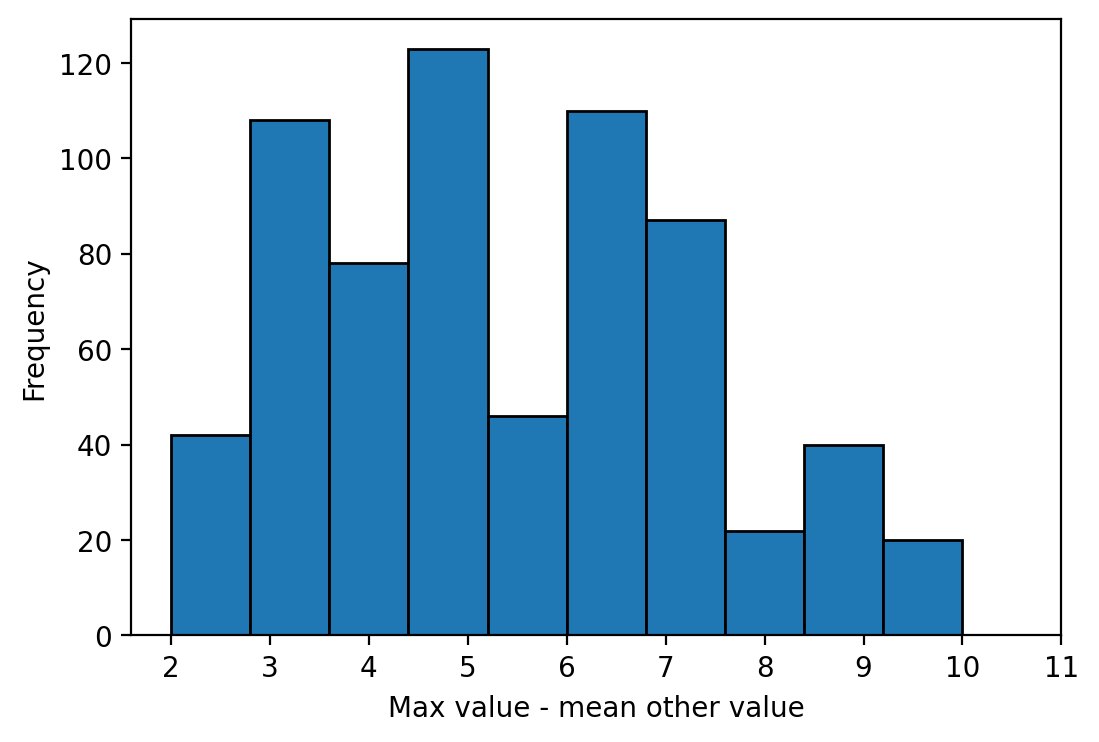

In [4]:
plt.figure(figsize=(6, 4))
plt.hist(df['difficulty'], edgecolor='black', density=False)
plt.xlabel("Max value - mean other value")
plt.ylabel("Frequency")
# plt.grid(True)
plt.xticks(range(2, 12, 1))
plt.show()

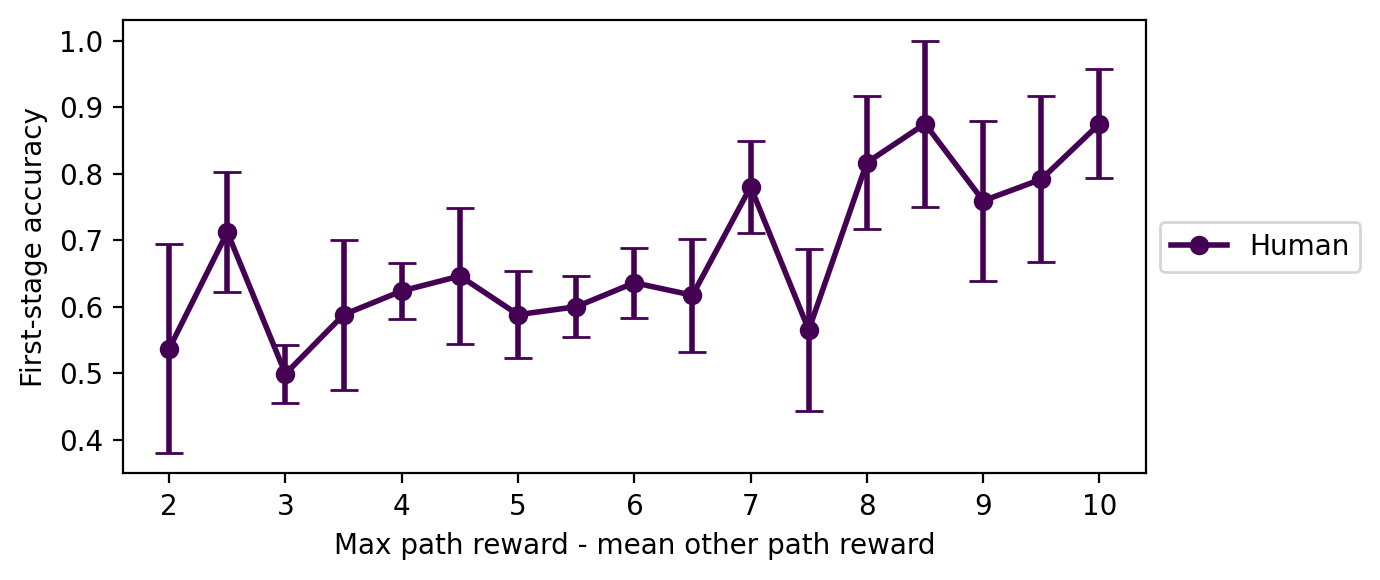

In [5]:
per1 = (
    df.groupby(['source','wid','diff1'])['correct1']
      .mean()
      .reset_index(name='accuracy1')
)

# 2. Compute group‐level mean and SEM
stats = (
    per1.groupby(['source','diff1'])['accuracy1']
        .agg(['mean','std','count'])
        .reset_index()
)
stats['sem'] = stats['std'] / np.sqrt(stats['count'])

unique_sources = sorted(stats['source'].unique())
n_sources = len(unique_sources)
cmap = plt.colormaps.get_cmap('viridis').resampled(n_sources)
norm = mcolors.Normalize(vmin=0, vmax=n_sources - 1)

fig, ax = plt.subplots(figsize=(7, 3))

for idx, (source, grp) in enumerate(stats.groupby('source')):
    color = cmap(norm(idx))
    ax.errorbar(grp['diff1'], grp['mean'], yerr=grp['sem'],
                marker='o', linewidth=2, capsize=5, label=str(source), color=color)

ax.set_xlabel('Max path reward - mean other path reward')
ax.set_ylabel('First-stage accuracy')

legend_elements = [
    Line2D([0], [0], color=cmap(norm(i)), marker='o', label=str(source),
           linestyle='-', linewidth=2)
    for i, source in enumerate(unique_sources)
]
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

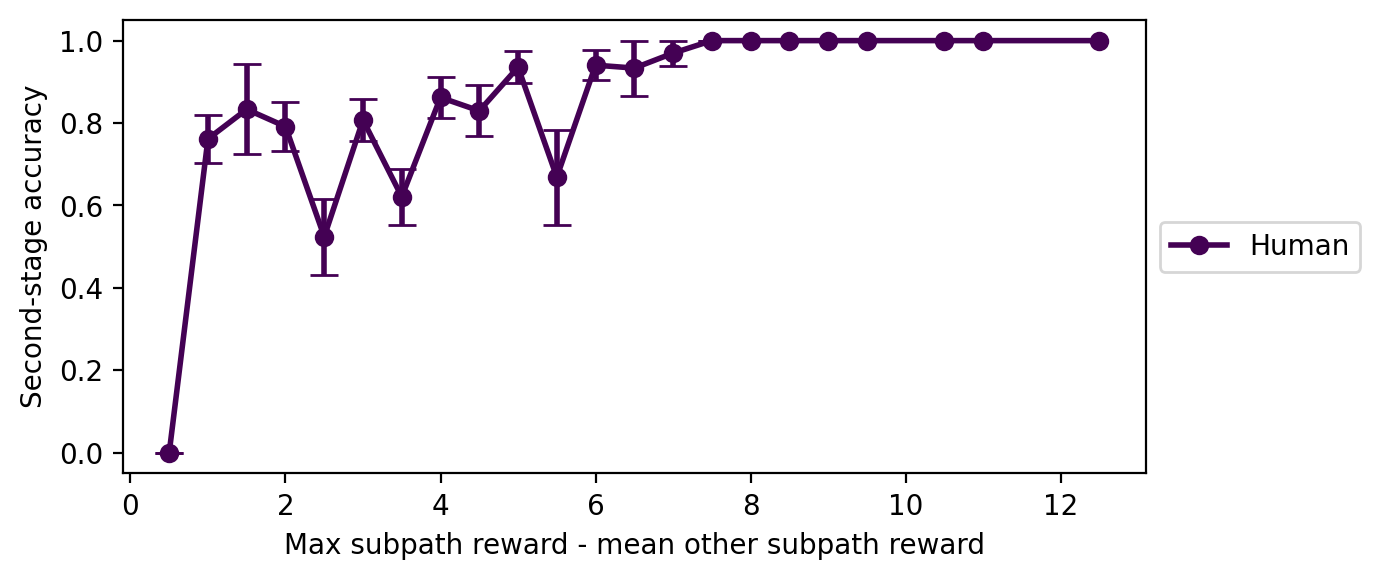

In [6]:
subdf = df.copy()
subdf = subdf[subdf['diff2'] != -1]
subdf = subdf[subdf['diff2'] != 0]

# b) Second‐stage accuracy by diff2
per2 = (
    subdf.groupby(['source','wid','diff2'])['correct2']
      .mean()
      .reset_index(name='accuracy2')
)

# 2. Compute group‐level mean and SEM
stats = (
    per2.groupby(['source','diff2'])['accuracy2']
        .agg(['mean','std','count'])
        .reset_index()
)
stats['sem'] = stats['std'] / np.sqrt(stats['count'])

# 3. colormap setup
unique_sources = sorted(stats['source'].unique())
n_sources = len(unique_sources)
cmap = plt.colormaps.get_cmap('viridis').resampled(n_sources)
norm = mcolors.Normalize(vmin=0, vmax=n_sources - 1)

# 3. Plot
fig, ax = plt.subplots(figsize=(7, 3))

# Plot each subject in gray
for idx, (source, grp) in enumerate(stats.groupby('source')):
    color = cmap(norm(idx))
    ax.errorbar(grp['diff2'], grp['mean'], yerr=grp['sem'],
                marker='o', linewidth=2, capsize=5, label=str(source), color=color)

ax.set_xlabel('Max subpath reward - mean other subpath reward')
ax.set_ylabel('Second-stage accuracy')

legend_elements = [
    Line2D([0], [0], color=cmap(norm(i)), marker='o', label=str(source),
           linestyle='-', linewidth=2)
    for i, source in enumerate(unique_sources)
]
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

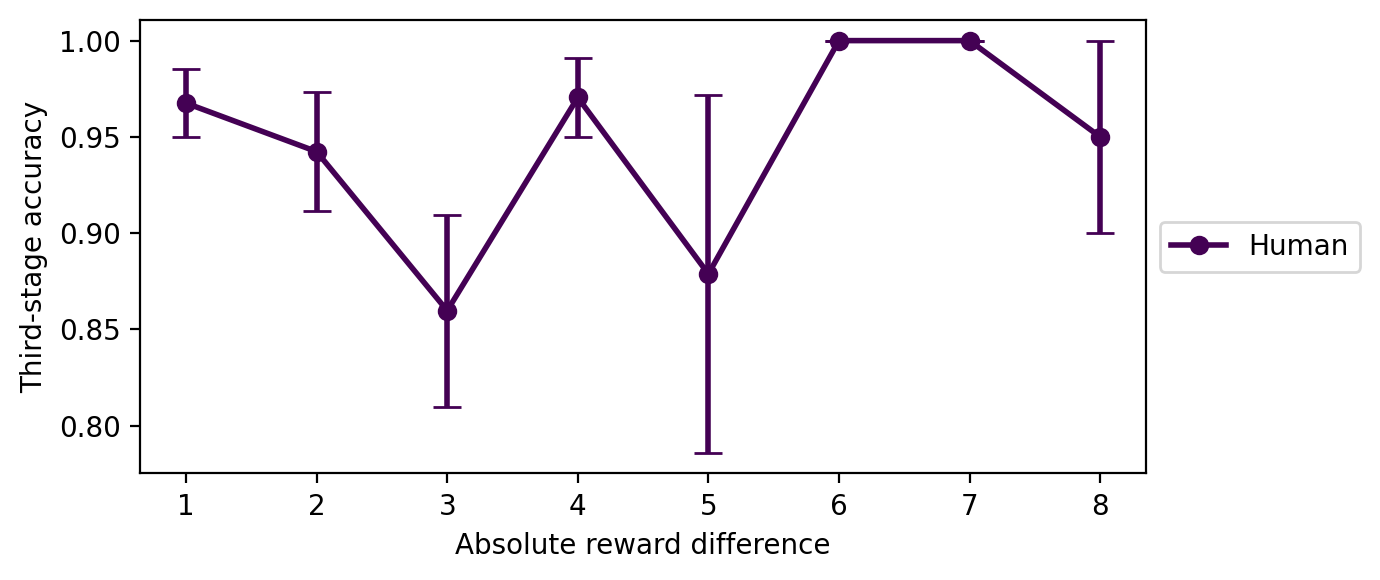

In [7]:
subdf = df.copy()
subdf = subdf[subdf['diff3'] != -1]
subdf = subdf[subdf['diff3'] != 0]

# b) Second‐stage accuracy by diff2
per2 = (
    subdf.groupby(['source','wid','diff3'])['correct3']
      .mean()
      .reset_index(name='accuracy3')
)

# 2. Compute group‐level mean and SEM
stats = (
    per2.groupby(['source','diff3'])['accuracy3']
        .agg(['mean','std','count'])
        .reset_index()
)
stats['sem'] = stats['std'] / np.sqrt(stats['count'])

# 3. colormap setup
unique_sources = sorted(stats['source'].unique())
n_sources = len(unique_sources)
cmap = plt.colormaps.get_cmap('viridis').resampled(n_sources)
norm = mcolors.Normalize(vmin=0, vmax=n_sources - 1)

# 3. Plot
fig, ax = plt.subplots(figsize=(7, 3))

# Plot each subject in gray
for idx, (source, grp) in enumerate(stats.groupby('source')):
    color = cmap(norm(idx))
    ax.errorbar(grp['diff3'], grp['mean'], yerr=grp['sem'],
                marker='o', linewidth=2, capsize=5, label=str(source), color=color)

ax.set_xlabel('Absolute reward difference')
ax.set_ylabel('Third-stage accuracy')

legend_elements = [
    Line2D([0], [0], color=cmap(norm(i)), marker='o', label=str(source),
           linestyle='-', linewidth=2)
    for i, source in enumerate(unique_sources)
]
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

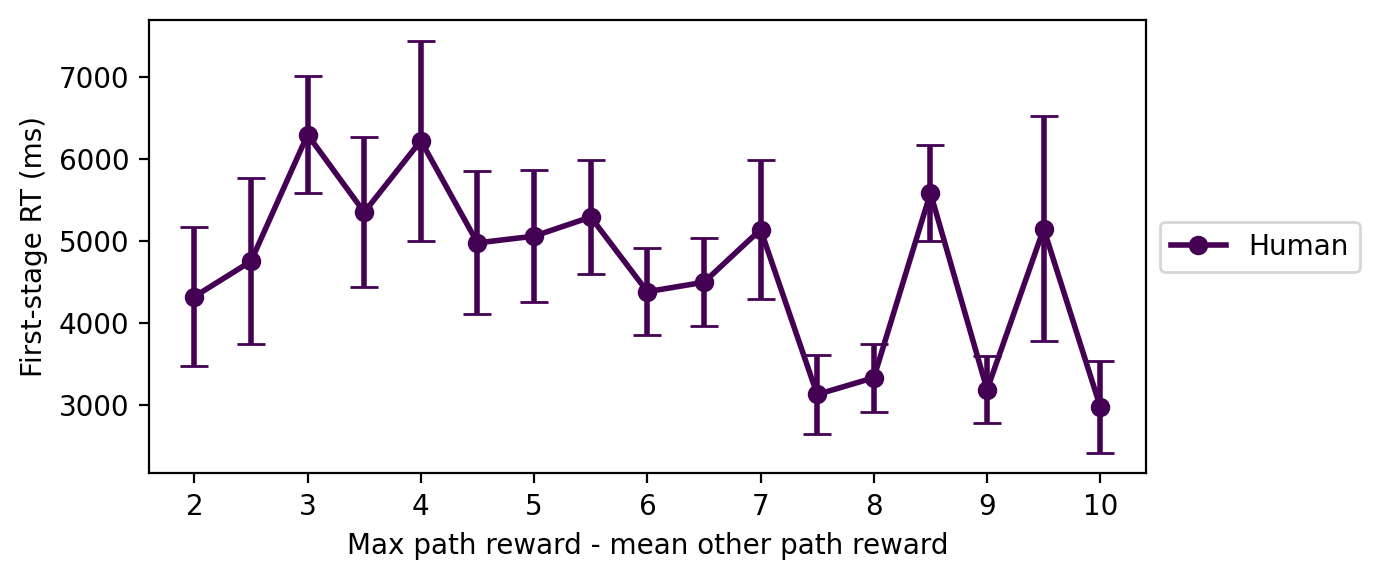

In [8]:
# c) First‐stage RT (mean) for correct trials by diff1
rt1 = (
    df[df['correct1']]
      .groupby(['source','wid','diff1'])['rt1']
      .mean()
      .reset_index(name='mean_rt1')
)

# 2. Compute group‐level mean and SEM
stats = (
    rt1.groupby(['source','diff1'])['mean_rt1']
        .agg(['mean','std','count'])
        .reset_index()
)
stats['sem'] = stats['std'] / np.sqrt(stats['count'])

# 3. Setup colormap (modern API, no warning)
unique_sources = sorted(stats['source'].unique())
n_sources = len(unique_sources)
cmap = plt.colormaps.get_cmap('viridis').resampled(n_sources)
norm = mcolors.Normalize(vmin=0, vmax=n_sources - 1)

# 4. Plot
fig, ax = plt.subplots(figsize=(7, 3))

for idx, (source, grp) in enumerate(stats.groupby('source')):
    color = cmap(norm(idx))
    ax.errorbar(grp['diff1'], grp['mean'], yerr=grp['sem'],
                marker='o', linewidth=2, capsize=5,
                label=str(source), color=color)

ax.set_xlabel('Max path reward - mean other path reward')
ax.set_ylabel('First-stage RT (ms)')

# 5. Custom legend
legend_elements = [
    Line2D([0], [0], color=cmap(norm(i)), marker='o',
           label=str(source), linestyle='-', linewidth=2)
    for i, source in enumerate(unique_sources)
]
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))

fig.tight_layout()
plt.show()

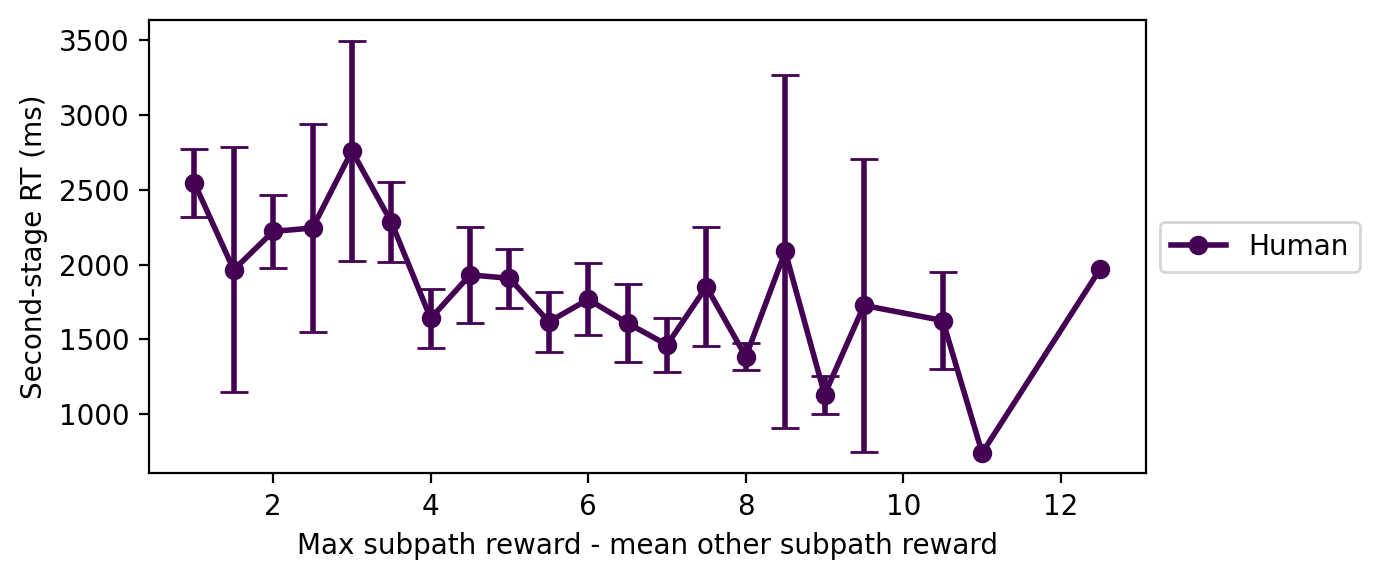

In [9]:
subdf = df.copy()
subdf = subdf[subdf['diff2'] != -1]
subdf = subdf[subdf['diff2'] != 0]

# d) Second‐stage RT (mean) for correct trials by diff2
rt2 = (
    subdf[subdf['correct2']]
      .groupby(['source','wid','diff2'])['rt2']
      .mean()
      .reset_index(name='mean_rt2')
)

# 2. Compute group‐level mean and SEM
stats = (
    rt2.groupby(['source','diff2'])['mean_rt2']
        .agg(['mean','std','count'])
        .reset_index()
)
stats['sem'] = stats['std'] / np.sqrt(stats['count'])

# 3. Colormap setup (no warning)
unique_sources = sorted(stats['source'].unique())
n_sources = len(unique_sources)
cmap = plt.colormaps.get_cmap('viridis').resampled(n_sources)
norm = mcolors.Normalize(vmin=0, vmax=n_sources - 1)

# 4. Plot
fig, ax = plt.subplots(figsize=(7, 3))

for idx, (source, grp) in enumerate(stats.groupby('source')):
    color = cmap(norm(idx))
    ax.errorbar(grp['diff2'], grp['mean'], yerr=grp['sem'],
                marker='o', linewidth=2, capsize=5,
                label=str(source), color=color)

ax.set_xlabel('Max subpath reward - mean other subpath reward')
ax.set_ylabel('Second-stage RT (ms)')

# Optional: ax.set_ylim(0, 4000)

# 5. Custom color-mapped legend
legend_elements = [
    Line2D([0], [0], color=cmap(norm(i)), marker='o',
           label=str(source), linestyle='-', linewidth=2)
    for i, source in enumerate(unique_sources)
]
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))

fig.tight_layout()
plt.show()

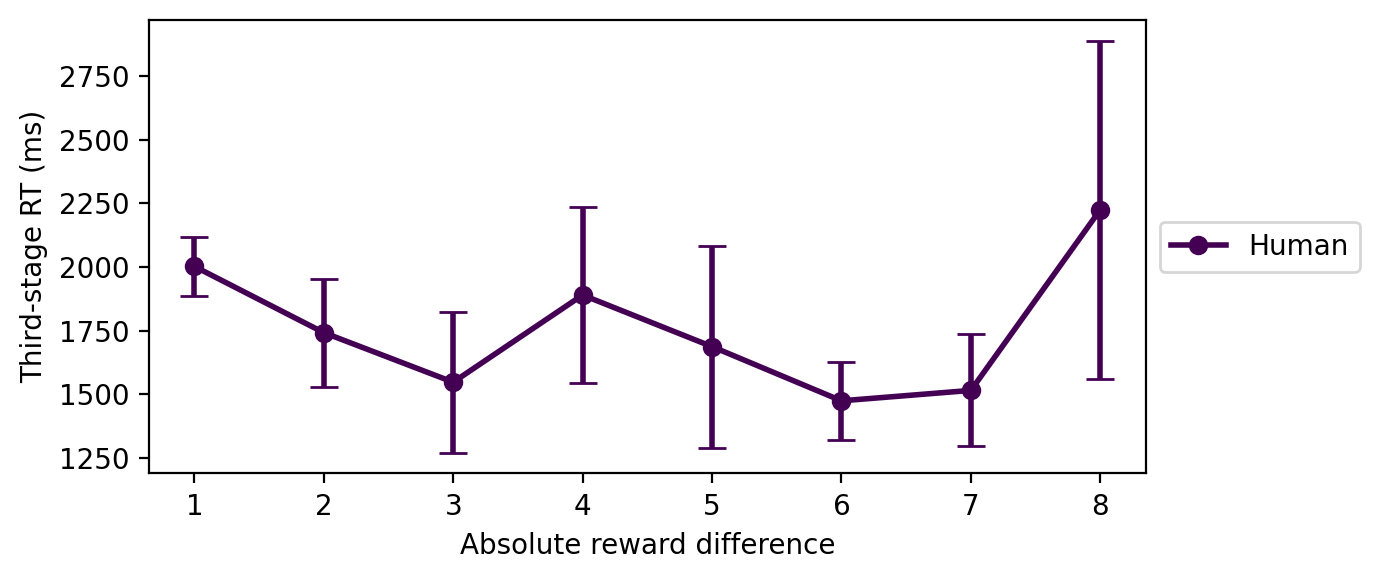

In [10]:
subdf = df.copy()
subdf = subdf[subdf['diff3'] != -1]
subdf = subdf[subdf['diff3'] != 0]

# d) Second‐stage RT (mean) for correct trials by diff2
rt2 = (
    subdf[subdf['correct3']]
      .groupby(['source','wid','diff3'])['rt3']
      .mean()
      .reset_index(name='mean_rt3')
)

# 2. Compute group‐level mean and SEM
stats = (
    rt2.groupby(['source','diff3'])['mean_rt3']
        .agg(['mean','std','count'])
        .reset_index()
)
stats['sem'] = stats['std'] / np.sqrt(stats['count'])

# 3. Colormap setup (no warning)
unique_sources = sorted(stats['source'].unique())
n_sources = len(unique_sources)
cmap = plt.colormaps.get_cmap('viridis').resampled(n_sources)
norm = mcolors.Normalize(vmin=0, vmax=n_sources - 1)

# 4. Plot
fig, ax = plt.subplots(figsize=(7, 3))

for idx, (source, grp) in enumerate(stats.groupby('source')):
    color = cmap(norm(idx))
    ax.errorbar(grp['diff3'], grp['mean'], yerr=grp['sem'],
                marker='o', linewidth=2, capsize=5,
                label=str(source), color=color)

ax.set_xlabel('Absolute reward difference')
ax.set_ylabel('Third-stage RT (ms)')

# Optional: ax.set_ylim(0, 4000)

# 5. Custom color-mapped legend
legend_elements = [
    Line2D([0], [0], color=cmap(norm(i)), marker='o',
           label=str(source), linestyle='-', linewidth=2)
    for i, source in enumerate(unique_sources)
]
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))

fig.tight_layout()
plt.show()

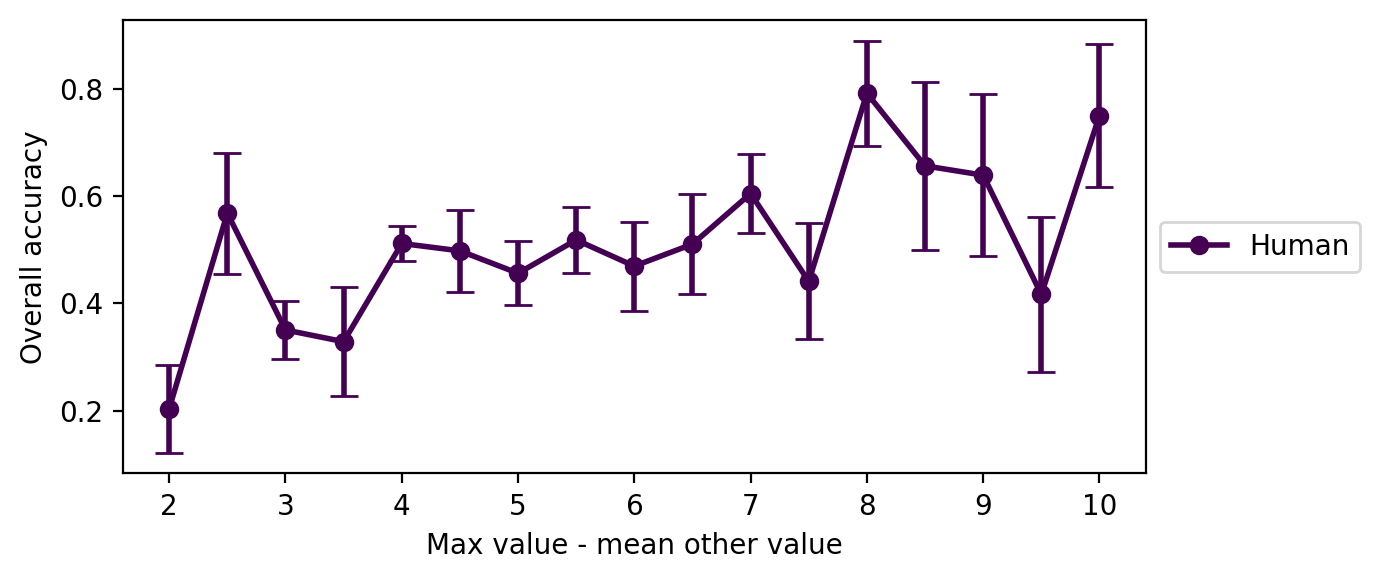

In [11]:
subdf = df.copy()
subdf = subdf[subdf['diff1'] != -1]

per1 = (
    subdf.groupby(['source','wid','diff1'])['correct_all']
      .mean()
      .reset_index(name='accuracy')
)

# 2. Compute group‐level mean and SEM
stats = (
    per1.groupby(['source','diff1'])['accuracy']
        .agg(['mean','std','count'])
        .reset_index()
)
stats['sem'] = stats['std'] / np.sqrt(stats['count'])

# 3. Colormap (modern API, gradient coloring)
unique_sources = sorted(stats['source'].unique())
n_sources = len(unique_sources)
cmap = plt.colormaps.get_cmap('viridis').resampled(n_sources)
norm = mcolors.Normalize(vmin=0, vmax=n_sources - 1)

# 4. Plot
fig, ax = plt.subplots(figsize=(7, 3))

for idx, (source, grp) in enumerate(stats.groupby('source')):
    color = cmap(norm(idx))
    ax.errorbar(grp['diff1'], grp['mean'], yerr=grp['sem'],
                marker='o', linewidth=2, capsize=5,
                label=str(source), color=color)

ax.set_xlabel('Max value - mean other value')
ax.set_ylabel('Overall accuracy')

# Optional: ax.set_ylim(0, 1)

# 5. Color-mapped legend
legend_elements = [
    Line2D([0], [0], color=cmap(norm(i)), marker='o',
           label=str(source), linestyle='-', linewidth=2)
    for i, source in enumerate(unique_sources)
]
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))

fig.tight_layout()
plt.show()

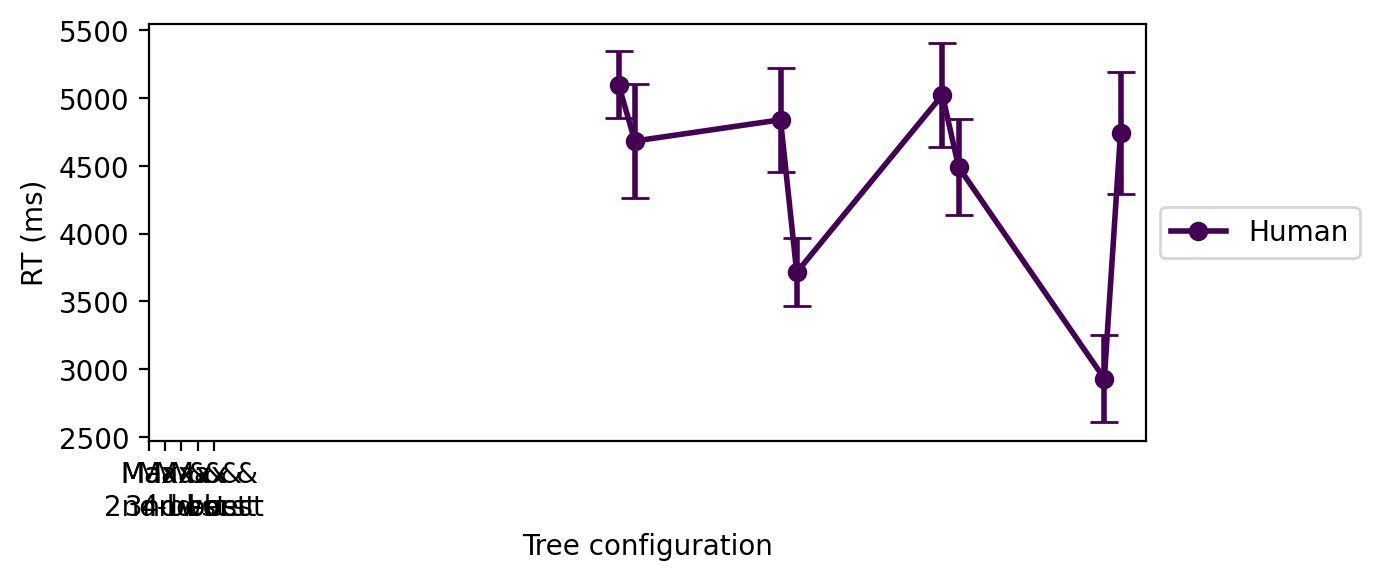

In [12]:
# 1. Compute mean and SEM of RT1 per source × subtree_relation
stats = df.groupby(['source', 'subtree_relation'])['rt1'].agg(['mean', 'sem']).reset_index()

# 2. Setup colormap
unique_sources = sorted(stats['source'].unique())
n_sources = len(unique_sources)
cmap = plt.colormaps.get_cmap('viridis').resampled(n_sources)
norm = mcolors.Normalize(vmin=0, vmax=n_sources - 1)

# 3. Plot
fig, ax = plt.subplots(figsize=(7, 3))

for idx, (source, grp) in enumerate(stats.groupby('source')):
    color = cmap(norm(idx))
    ax.errorbar(grp['subtree_relation'], grp['mean'], yerr=grp['sem'],
                marker='o', linewidth=2, capsize=5,
                label=str(source), color=color)

# 4. Label formatting
ax.set_xlabel('Tree configuration')
ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels(['Max', 'Max &\n2nd-best', 'Max &\n 3nd-best', 'Max &\n 4nd-best', 'Max &\n worst'])
ax.set_ylabel('RT (ms)')

# 5. Custom color-coded legend
legend_elements = [
    Line2D([0], [0], color=cmap(norm(i)), marker='o',
           label=str(source), linestyle='-', linewidth=2)
    for i, source in enumerate(unique_sources)
]
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))

fig.tight_layout()
plt.show()
